# Training a Food Image Classfier

In this notebook, we will train a Resnet-50 CNN on the [Food-101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/) dataset.

The dataset included 101 food categories with each class having 1000 images.

## Imports

Import the fastai library and other dependencies

In [1]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json


In [2]:
from fastai import *
from fastai.vision import *

# Retrieving Data

Run the below commands  if you need to fetch the data.


In [ ]:
!mkdir -p ../data
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz -P ../data
!tar xzf ../data/food-101.tar.gz ../data

# Load Data

The data is stored in the "data" folder; one directory above.     
Each of the 101 food categores is stored in its own folder

In [3]:
!ls ../data

food-101  food-101.tar.gz  subset  test  untitled.txt


In [4]:
!ls ../data/food-101/

images	license_agreement.txt  meta  README.txt


The first 5 of the 101 categories

In [5]:
!ls ../data/food-101/images | head -n 5

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare


read the images 

In [6]:
path = Path('../data/food-101/images')


In [7]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8, bs=64).normalize(imagenet_stats)

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

## Train Model

# Initialize Rest

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=True)

In [10]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [11]:
learn.fit_one_cycle(6)


epoch,train_loss,valid_loss,error_rate
1,2.136980,1.698903,0.434752
2,1.866584,1.445811,0.374059
3,1.654743,1.319605,0.343218
4,1.519451,1.230740,0.321584
5,1.395402,1.177045,0.306832
6,1.323482,1.170237,0.304851


In [12]:
model_name="resnet34"

In [13]:
learn.save(f'{model_name}-stage-1')

In [14]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category foie_gras, Category foie_gras, Category foie_gras, Category foie_gras, Category foie_gras]...
Path: ../data/food-101/images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 384, 512), Image (3, 384, 512)]...
Path: ../data/food-101/images;

Valid: LabelList
y: CategoryList (20200 items)
[Category pho, Category cannoli, Category cheese_plate, Category crab_cakes, Category apple_pie]...
Path: ../data/food-101/images
x: ImageItemList (20200 items)
[Image (3, 512, 512), Image (3, 384, 512), Image (3, 512, 382), Image (3, 512, 512), Image (3, 512, 512)]...
Path: ../data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

In [15]:
learn.unfreeze()


In [16]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


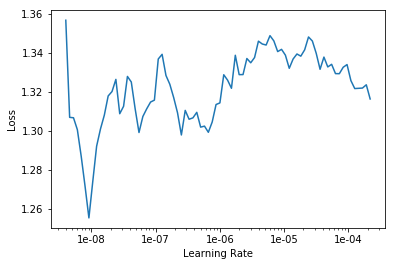

In [17]:
learn.recorder.plot(skip_end=10)


In [18]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))


epoch,train_loss,valid_loss,error_rate
1,1.341294,1.158732,0.302772
2,1.304695,1.142677,0.297673
3,1.308153,1.129446,0.295198
4,1.298019,1.122877,0.293861
5,1.273065,1.120488,0.293762


In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,1.258473,1.093494,0.288564
2,1.183261,1.028373,0.270842
3,1.102335,0.984863,0.261238
4,1.044600,0.963414,0.255743
5,1.011621,0.960195,0.254158


In [22]:
learn.save(f'{model_name}-stage-2')

In [24]:
learn.load(f'{model_name}-stage-2');

# Interpretation

In [25]:
learn.load(f'{model_name}-stage-2');


In [26]:
interp = ClassificationInterpretation.from_learner(learn)

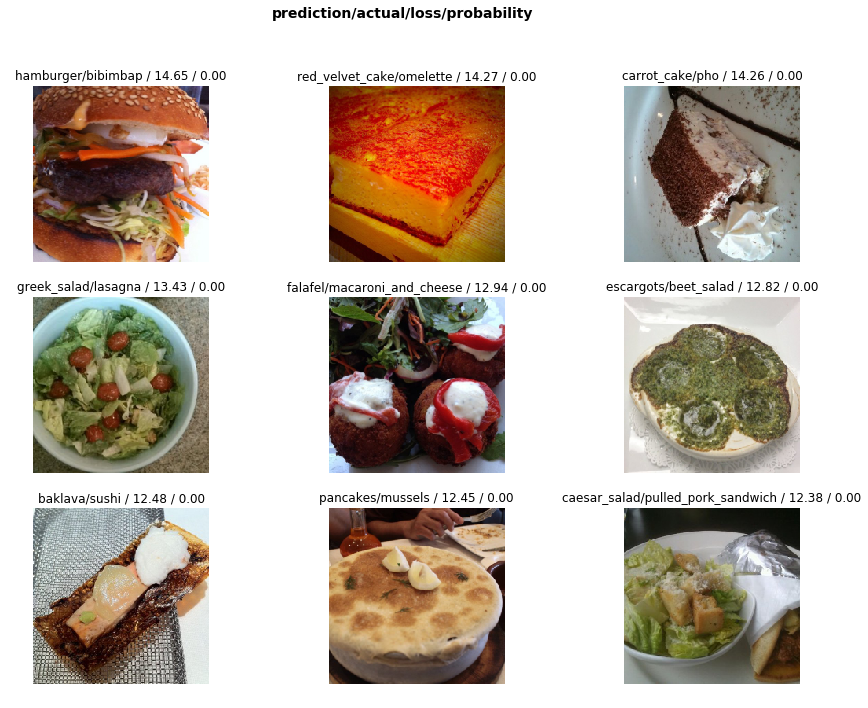

In [27]:
interp.plot_top_losses(9, figsize=(15,11))


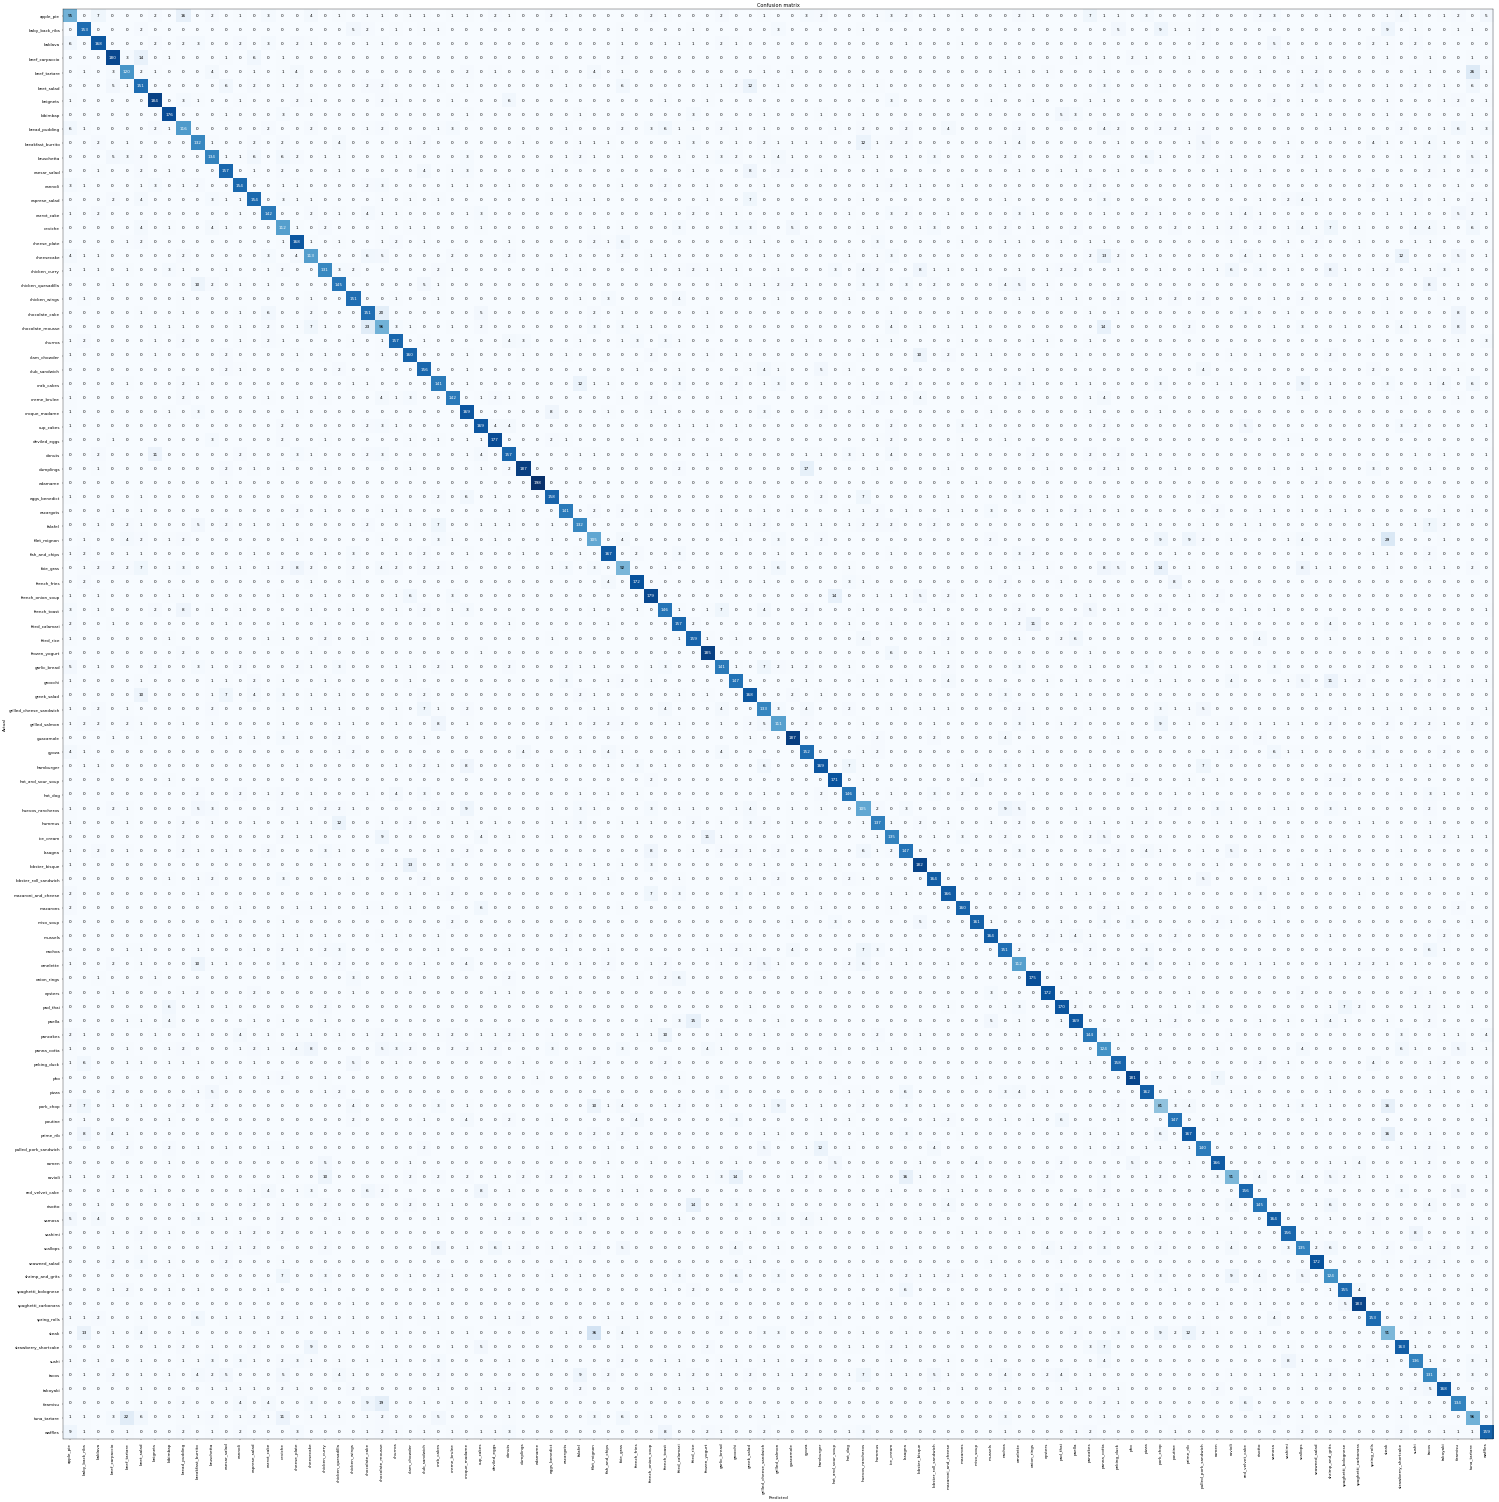

In [28]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=30)


In [29]:
interp.most_confused(min_val=2)


[('steak', 'filet_mignon', 36),
 ('filet_mignon', 'steak', 29),
 ('beef_tartare', 'tuna_tartare', 26),
 ('chocolate_mousse', 'chocolate_cake', 23),
 ('tuna_tartare', 'beef_tartare', 22),
 ('chocolate_cake', 'chocolate_mousse', 20),
 ('tiramisu', 'chocolate_mousse', 19),
 ('dumplings', 'gyoza', 17),
 ('apple_pie', 'bread_pudding', 16),
 ('pork_chop', 'steak', 16),
 ('prime_rib', 'steak', 16),
 ('ravioli', 'lasagna', 16),
 ('paella', 'fried_rice', 15),
 ('beef_carpaccio', 'beet_salad', 14),
 ('chocolate_mousse', 'panna_cotta', 14),
 ('foie_gras', 'pork_chop', 14),
 ('french_onion_soup', 'hot_and_sour_soup', 14),
 ('ravioli', 'gnocchi', 14),
 ('risotto', 'fried_rice', 14),
 ('cheesecake', 'panna_cotta', 13),
 ('lobster_bisque', 'clam_chowder', 13),
 ('steak', 'baby_back_ribs', 13),
 ('beet_salad', 'greek_salad', 12),
 ('breakfast_burrito', 'huevos_rancheros', 12),
 ('cheesecake', 'strawberry_shortcake', 12),
 ('crab_cakes', 'falafel', 12),
 ('hummus', 'chicken_quesadilla', 12),
 ('pulled_

In [30]:
final_model_name = f'{model_name}-final'

In [31]:
learn.save(final_model_name)

# Testing on Different Data

The model 

### Loading Trained model

In [32]:
learn.load(final_model_name);

In [33]:
learn.data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet50)
learn.load(final_model_name)

In [ ]:
data2.classes, data2.c

**bibimbap**

In [ ]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [ ]:
#!wget {url} -O sample.jpg

In [ ]:
url = bibimbap_url

In [ ]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [ ]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

In [ ]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

**Baby Back Rib**

In [ ]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"

In [ ]:
predict(baby_back_url)

**Cat**

In [ ]:
cat_image_url = "https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg"

In [ ]:
predict(cat_image_url)

**Icecream**

In [ ]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"

In [ ]:
predict(icecream_url)

**Banana**

In [ ]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"

In [ ]:
predict(banana_url)

# Prepare for production

To make our model available as a web app, we will need to save:
- final model
- list of class names

Remove existing model artifacts

In [ ]:
shutil.rmtree("../models",ignore_errors=True)

Copy the models stored locally to folder above

In [ ]:
shutil.copytree(path/"models", "../models")

Save the list of classes

In [ ]:
with open('../models/classes.txt', 'w') as f:
    json.dump(learn.data.classes,f)

## Next Steps

Refer to this [guide](https://github.com/npatta01/food-classifier/blob/master/docs/2_heroku_app.md) to deploy the model on heroku